### 修改fbprophet源码以支持以小时为粒度的预测

https://blog.csdn.net/wjskeepmaking/article/details/65626872

读取数据...
                     ds    y   floor     cap
0   2018-01-01 00:00:00    0  1000.0  4000.0
1   2018-01-01 01:00:00    0  1000.0  4000.0
2   2018-01-01 02:00:00    0  1000.0  4000.0
3   2018-01-01 03:00:00    0  1000.0  4000.0
4   2018-01-01 04:00:00    0  1000.0  4000.0
..                  ...  ...     ...     ...
739 2018-01-31 19:00:00  796  1000.0  4000.0
740 2018-01-31 20:00:00  698  1000.0  4000.0
741 2018-01-31 21:00:00  501  1000.0  4000.0
742 2018-01-31 22:00:00  121  1000.0  4000.0
743 2018-01-31 23:00:00    0  1000.0  4000.0

[744 rows x 4 columns]
开始计算...
完成计算


,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,Chinese New Year,Chinese New Year_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01 00:00:00,1000.0,4000.0,1000.0,636.263279,1150.724394,1000.0,1000.0,0.0,0.0,...,-290.993291,-290.993291,-290.993291,-270.063500,-270.063500,-270.063500,0.0,0.0,0.0,891.333496
1,2018-01-01 01:00:00,1000.0,4000.0,1000.0,602.835496,1096.065285,1000.0,1000.0,0.0,0.0,...,-320.981510,-320.981510,-320.981510,-272.191219,-272.191219,-272.191219,0.0,0.0,0.0,842.648158
2,2018-01-01 02:00:00,1000.0,4000.0,1000.0,619.354886,1102.495794,1000.0,1000.0,0.0,0.0,...,-300.201151,-300.201151,-300.201151,-274.308130,-274.308130,-274.308130,0.0,0.0,0.0,843.489712
3,2018-01-01 03:00:00,1000.0,4000.0,1000.0,577.713703,1096.719080,1000.0,1000.0,0.0,0.0,...,-310.886613,-310.886613,-310.886613,-276.414194,-276.414194,-276.414194,0.0,0.0,0.0,841.858462
4,2018-01-01 04:00:00,1000.0,4000.0,1000.0,597.015350,1082.845863,1000.0,1000.0,0.0,0.0,...,-332.243751,-332.243751,-332.243751,-278.509369,-278.509369,-278.509369,0.0,0.0,0.0,838.932593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,2019-08-06 21:00:00,1000.0,4000.0,1000.0,638.410750,1149.920138,1000.0,1000.0,0.0,0.0,...,-120.117512,-120.117512,-120.117512,-81.196614,-81.196614,-81.196614,0.0,0.0,0.0,890.642353
13990,2019-08-06 22:00:00,1000.0,4000.0,1000.0,256.608107,764.710136,1000.0,1000.0,0.0,0.0,...,-126.113784,-126.113784,-126.113784,-81.372404,-81.372404,-81.372404,0.0,0.0,0.0,523.394076
13991,2019-08-06 23:00:00,1000.0,4000.0,1000.0,59.838970,562.301509,1000.0,1000.0,0.0,0.0,...,-141.274906,-141.274906,-141.274906,-81.541919,-81.541919,-81.541919,0.0,0.0,0.0,294.501814
13992,2019-08-07 00:00:00,1000.0,4000.0,1000.0,78.706402,590.030967,1000.0,1000.0,0.0,0.0,...,-132.378423,-132.378423,-132.378423,-81.705150,-81.705150,-81.705150,0.0,0.0,0.0,323.912198


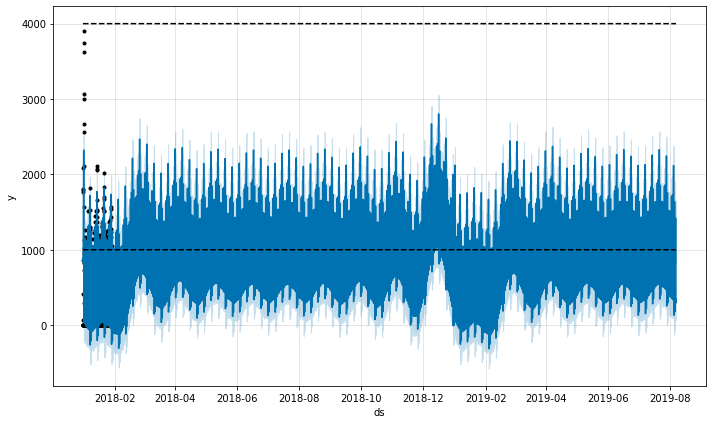

In [70]:
from fbprophet import Prophet
import pandas as pd

print("读取数据...")

# 虎门火车站
df = pd.read_csv('./humen_test.csv')
df["ds"] = pd.to_datetime(df["ds"])

df["floor"] = 1000.0 
df['cap'] = 4000.0
df2 = df[df['ds'] < "2018-02-01 00:00:00"]
print(df2)

national = pd.DataFrame({
  'holiday': 'national day',
  'ds': pd.to_datetime(['2017-10-01','2018-10-01','2019-10-01','2020-10-01']),
  'lower_window': 0,
  'upper_window': 1,
})

print("开始计算...")
m = Prophet(growth="logistic",#changepoint_prior_scale=0.02, 
        #seasonality_prior_scale= 0.5, holidays_prior_scale=0.5, 
        weekly_seasonality=False, yearly_seasonality=True,
        daily_seasonality=False,holidays=national)#, seasonality_mode='multiplicative')
m.add_seasonality(name='weekly', period=7, fourier_order=40)
m.add_seasonality(name='daily', period=1, fourier_order=40)

m.add_country_holidays(country_name='CN')
m.fit(df2)
future = m.make_future_dataframe(periods=13250, freq='H')
future["floor"] = 1000.0 
future["cap"] = 4000.0
fcst = m.predict(future)
print("完成计算")
m.plot(fcst)
fcst

输出数据：

2019-07 模型预测进站量:643709 实际进站量:634139 总误差: 1.5092%


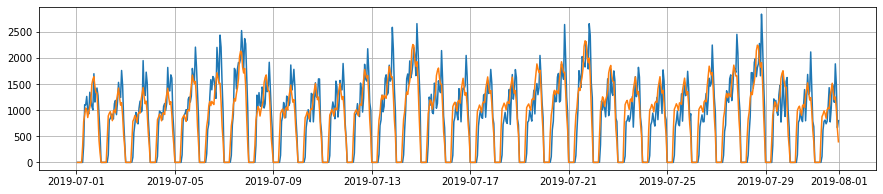

In [71]:
import numpy as np
import matplotlib.pyplot as plt 
import random

fcst1 = fcst[["ds","yhat"]]
fds = []
fyh = []
for item in zip(fcst["ds"],fcst["yhat"]):
    v = item[1]
    if item[1] <= 0.0001: v = 0
    if item[0].hour <= 4: v = 0
    if item[0].hour == 5: v = int(random.random()*5)
    fds.append(item[0])
    fyh.append(v)
cols={"ds": fds,"yhat": fyh}
fcst1 = pd.DataFrame(cols,columns=['ds', 'yhat'])
print("输出数据：")

plt.figure(figsize=(15, 3))
plt.grid(True)

df1 = df[df['ds'] > "2019-07-01 00:00:00"]
df1 = df1[df1['ds'] < "2019-08-01 00:00:00"]
df1 = df1["y"]

pre = fcst1
pre1 = pre[pre['ds'] > "2019-07-01 00:00:00"]
pre1 = pre1[pre1['ds'] < "2019-08-01 00:00:00"]
x = pre1['ds']

pre1 = [ item for item in pre1["yhat"] ]

fcst2 = fcst1[fcst1['ds'] > "2019-12-31 23:00:00"]
fcst2 = fcst2[fcst2['ds'] < "2021-01-01 00:00:00"]
with open('d0d_result.csv',"w") as f:
    for items in zip(fcst2["ds"], fcst2["yhat"]):
        k = items[0]
        v = items[1]
        f.write("%04d-%02d-%02d %02d:%02d:%02d,%d\n"%(k.year,k.month,k.day,k.hour,k.minute,k.second,int(v) if v - int(v) < 0.5 else int(v)+1))

print("\n2019-07 模型预测进站量:%d 实际进站量:%d 总误差: %.4f%%"%(int(sum(pre1)),int(sum(df1)),(sum(pre1)-sum(df1))/sum(df1)*100.0))
plt.plot(x,df1,x,pre1)